In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} =  
\ (Z_{n}^{-x^{Z_{n}^{-c}}} + x^{-Z_{n}^{-c^{Z_{n}}}} * c^{-Z_{n}^{-x^{Z_{n}}}} - Z_{n}^{-x^{Z_{n}^{-c}}}) +
\ (Z_{n}^{-x^{Z_{n}^{-c}}} - x^{-Z_{n}^{-c^{Z_{n}}}} * c^{-Z_{n}^{-x^{Z_{n}}}} + Z_{n}^{-x^{Z_{n}^{-c}}})
\end{eqnarray}""")

<IPython.core.display.Latex object>

# IslaLace
    rehash of matlab function IslaLace
    x = p[0]
    c = p[1]
    Z = ( Z**(-x**(Z**(-c))) + x**(-Z**(-c**Z))) * (c**(-Z**(-x**Z)) - Z**(-x**(-Z**(-c))) ) + \
        ( Z**(-x**(Z**(-c))) - x**(-Z**(-c**Z))) * (c**(-Z**(-x**Z)) + Z**(-x**(-Z**(-c))) )

    Original:
    Z = (
        Z^(-x^(Z^(-c))) + 
        x^(-Z^(-c^Z))) * (c^(-Z^(-x^Z)) - 
        Z^(-x^(-Z^(-c)))
        ) 
        +
        (
        Z^(-x^(Z^(-c))) - 
        x^(-Z^(-c^Z))) * (c^(-Z^(-x^Z)) + 
        Z^(-x^(-Z^(-c)))
        );

    tsty_26
    lanier@rohan.sdsu.edu	04-Jul-2008
    fhandle= @IslaLace;
    bBox=[-3.36+2.52i; 3.36+2.52i; -3.36-2.52i; 3.36-2.52i];
    zc=0];
    S_lim=32];
    B_lim=4];
    
    Pretty Good Parameters
    asty26.tiff:     c=[0.444476893762, 0.508164683992+0.420921535772j]    
    asty27.tiff:     c=[1.032258783648, 0.229133372072+0.959497026392j]
    asty64.tiff:     c=[1.047484735483, -0.314137674746-0.226707640874j]


In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp


asty26 = [0.444476893762, 0.508164683992 + 0.420921535772j]
asty27 = [1.032258783648, 0.229133372072 + 0.959497026392j]
asty64 = [1.047484735483, -0.314137674746 - 0.226707640874j]

In [3]:
def IslaLace(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    x = p[0]
    c = p[1]
    Z = ( Z**(-x**(Z**(-c))) + x**(-Z**(-c**Z))) * (c**(-Z**(-x**Z)) - Z**(-x**(-Z**(-c))) ) + \
        ( Z**(-x**(Z**(-c))) - x**(-Z**(-c**Z))) * (c**(-Z**(-x**Z)) + Z**(-x**(-Z**(-c))) )
    return Z

19.914863109588623 	 total time
converstion time =	 1.2551310062408447
coloring time:	 7.483126878738403


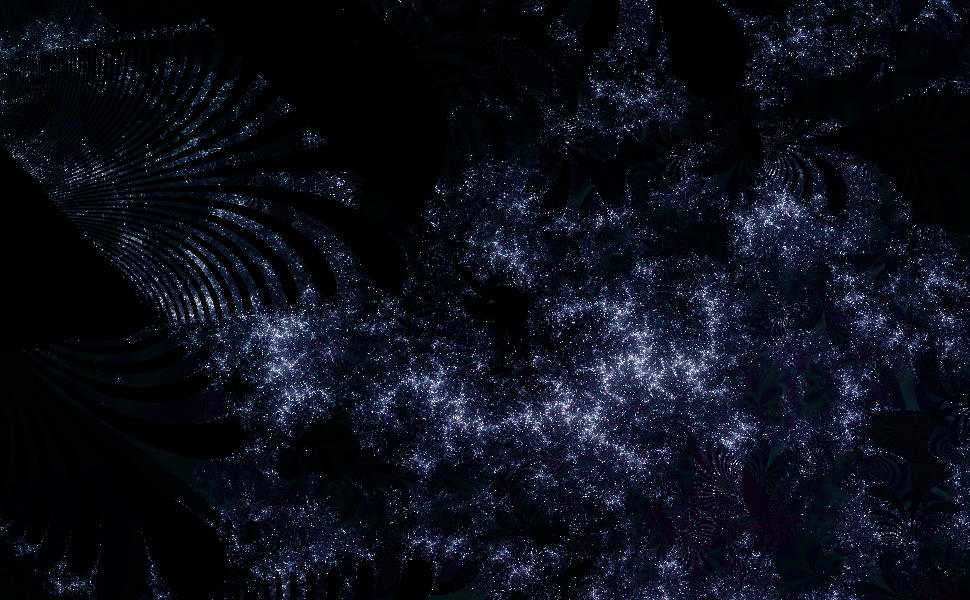

In [4]:
#                                        -- define parameters iterate the above equation  --  "separable" parameter p
par_set = {'n_rows': 600, 'n_cols': 970}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = np.pi / 4
par_set['zoom'] = 1/4

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(IslaLace, (asty26))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

H = ncp.range_norm(Zr - Zd, lo=0.5, hi=0.85)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.9)
V = ncp.range_norm(ETn, lo=0.0, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

18.067209005355835 	 total time
converstion time =	 1.4167518615722656
coloring time:	 7.258087158203125


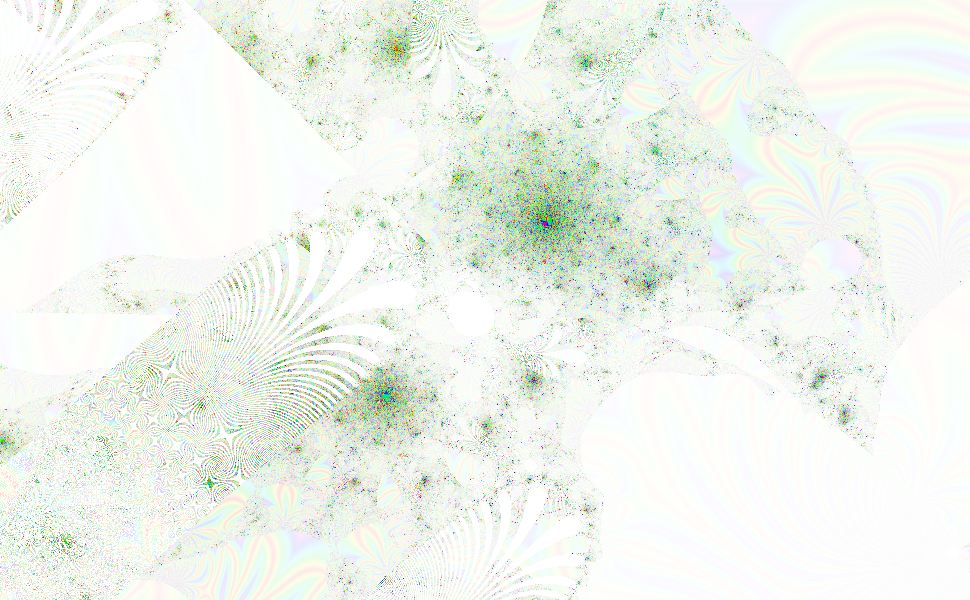

In [5]:
par_set = {'n_rows': 600, 'n_cols': 970}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = np.pi / 4
par_set['zoom'] = 1/4

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(IslaLace, (asty27))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

H = ncp.range_norm(Zd - Zr, lo=0.0, hi=1.0)
S = ncp.range_norm(ETn, lo=0.0, hi=1.0)
V = ncp.range_norm(1 - ETn, lo=0.9, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

59.30699419975281 	 total time
converstion time =	 1.3692700862884521
coloring time:	 7.941879987716675


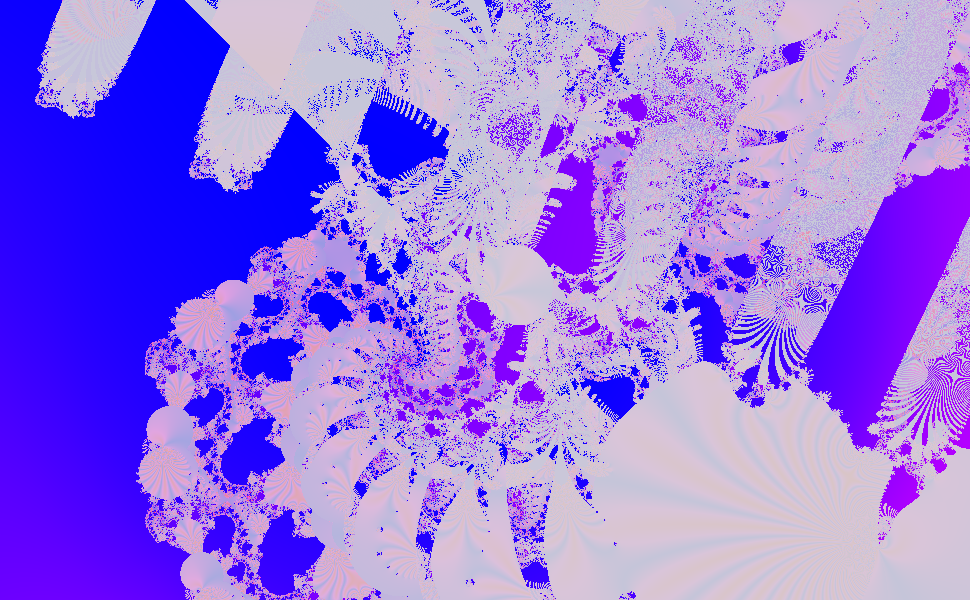

In [6]:
par_set = {'n_rows': 600, 'n_cols': 970}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = np.pi / 4
par_set['zoom'] = 1/4

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(IslaLace, (asty64))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

H = ncp.range_norm(Zr * Zd, lo=0.6667, hi=1.0)
S = ncp.range_norm(ETn, lo=0.08, hi=1.0)
V = ncp.range_norm(ETn, lo=0.85, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [7]:
#                                        -- define parameters iterate the above equation  --  "ropey" parameter p
par_set = {'n_rows': 600, 'n_cols': 970}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = np.pi / 4
par_set['zoom'] = 1/4

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(IslaLace, (asty26))]
t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

18.902437210083008 	 total time
converstion time =	 1.4148809909820557


coloring time:	 7.876280069351196


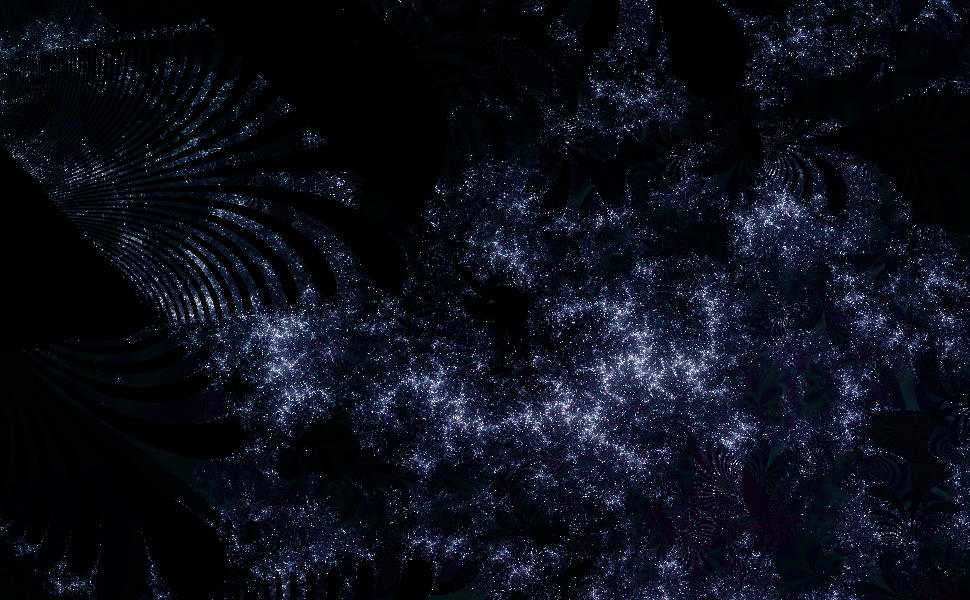

In [8]:
H = ncp.range_norm(Zr - Zd, lo=0.5, hi=0.85)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.9)
V = ncp.range_norm(ETn, lo=0.0, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 7.480432033538818


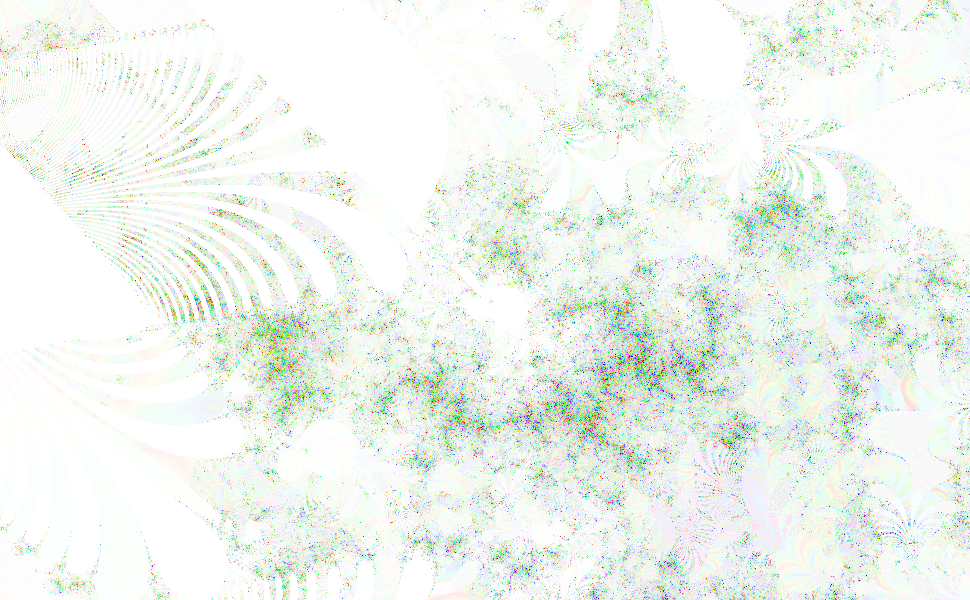

In [9]:
H = ncp.range_norm(Zd - Zr, lo=0.0, hi=1.0)
S = ncp.range_norm(ETn, lo=0.0, hi=1.0)
V = ncp.range_norm(1 - ETn, lo=0.9, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 8.016196966171265


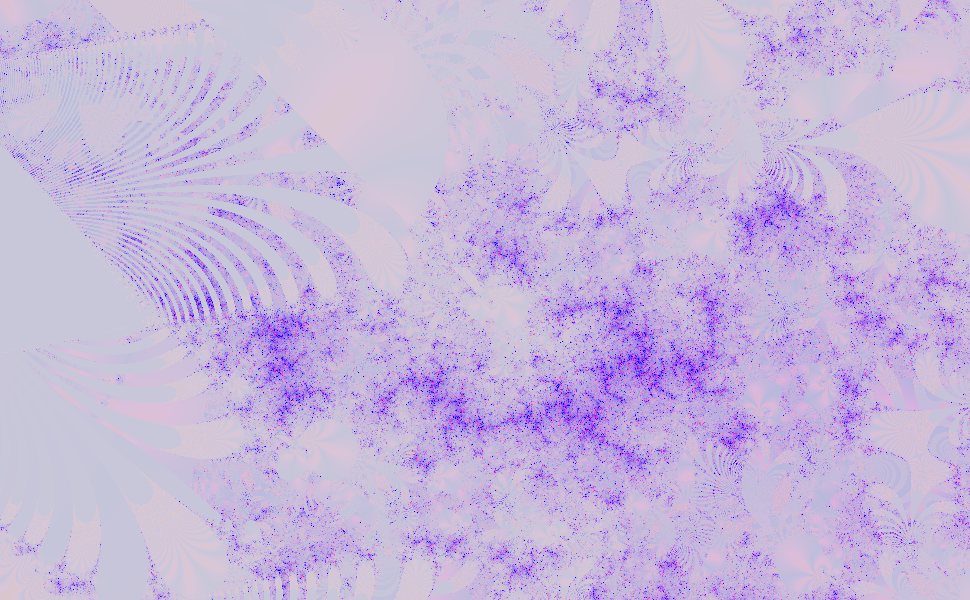

In [10]:
H = ncp.range_norm(Zr * Zd, lo=0.6667, hi=1.0)
S = ncp.range_norm(ETn, lo=0.08, hi=1.0)
V = ncp.range_norm(ETn, lo=0.85, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [11]:
#                                        smaller -> view individual escape time sets -- "iconic" 
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = np.pi / 4
par_set['zoom'] = 1/4

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(IslaLace, (asty26))]
t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print('converstion time =\t', time.time() - t0)

1.6030879020690918 	 total time
converstion time =	 0.0881350040435791


coloring time =	 0.26176905632019043


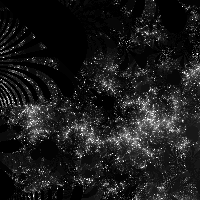

In [12]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 0.2679100036621094


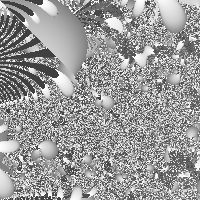

In [13]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 0.26970386505126953


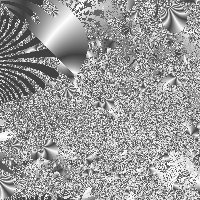

In [14]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

ET =	 2


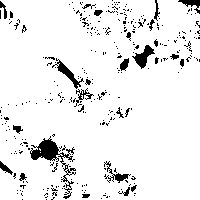

ET =	 3


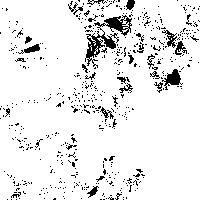

ET =	 4


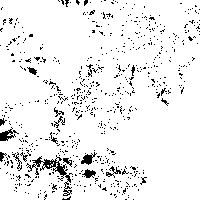

ET =	 5


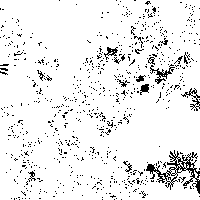

ET =	 6


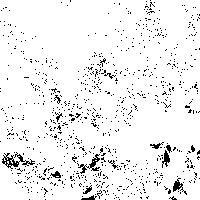

ET =	 7


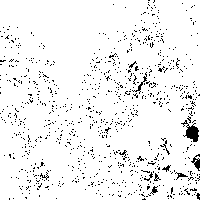

ET >	 8


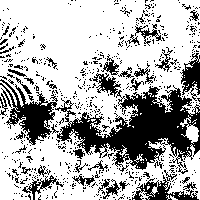

In [15]:
#                                        view smaller - individual escape time starting points
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [16]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 9578
2 3040
3 3334
4 2726
5 2902
6 2380
7 2229
8 1542
9 1581
10 1126
11 997
12 817
13 762
14 605
15 553
16 490
17 457
18 396
19 371
20 330
21 304
22 270
23 253
24 217
25 199
26 181
27 163
28 159
29 157
30 129
31 146
32 98
33 111
34 112
35 88
36 78
37 81
38 69
39 76
40 84
41 53
42 50
43 50
44 47
45 42
46 37
47 41
48 37
49 40
50 40
51 26
52 23
53 23
54 19
55 20
56 15
57 17
58 12
59 11
60 15
61 23
62 14
63 5
64 15

How many never escaped:
> 134


In [17]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0_sm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  4.54 106.7 degrees

      134 total unescaped points

   points near V       (plane units)
       36 within V/ 1  (4.542)
        4 within V/ 2  (2.271)
        4 within V/ 3  (1.514)
        1 within V/ 4  (1.135)
        1 within V/ 5  (0.908)
        1 within V/ 6  (0.757)
        1 within V/ 7  (0.649)
        1 within V/ 8  (0.568)
        1 within V/ 9  (0.505)
        1 within V/10  (0.454)
        1 within V/11  (0.413)
